In [6]:
#load modules
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn import tree
import matplotlib.pyplot as plt

In [8]:
#laod dataset
df = pd.read_csv("data/iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
#initialize features and target
X = df.drop('species', axis=1)
y = df['species']

In [12]:
#train split and test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [15]:
#initialize model for prediction
model_clf = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
model_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [19]:
y_pred = model_clf.predict(X_test)
print(y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


In [20]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report\n:", classification_report(y_test, y_pred))

Accuracy Score: 1.0

Classification Report
:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 1.0, 'Confusion Matrix Visualization')

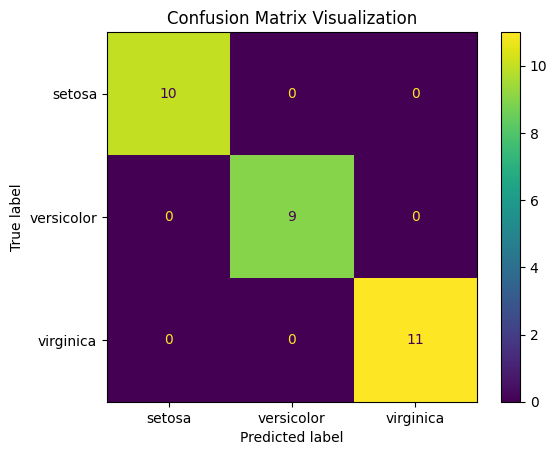

In [24]:
#confusion matrix  
ConfusionMatrixDisplay.from_estimator(model_clf, X_test, y_test, display_labels=y.unique())
plt.title("Confusion Matrix Visualization")

Text(0.5, 1.0, 'Decision tree plot for species')

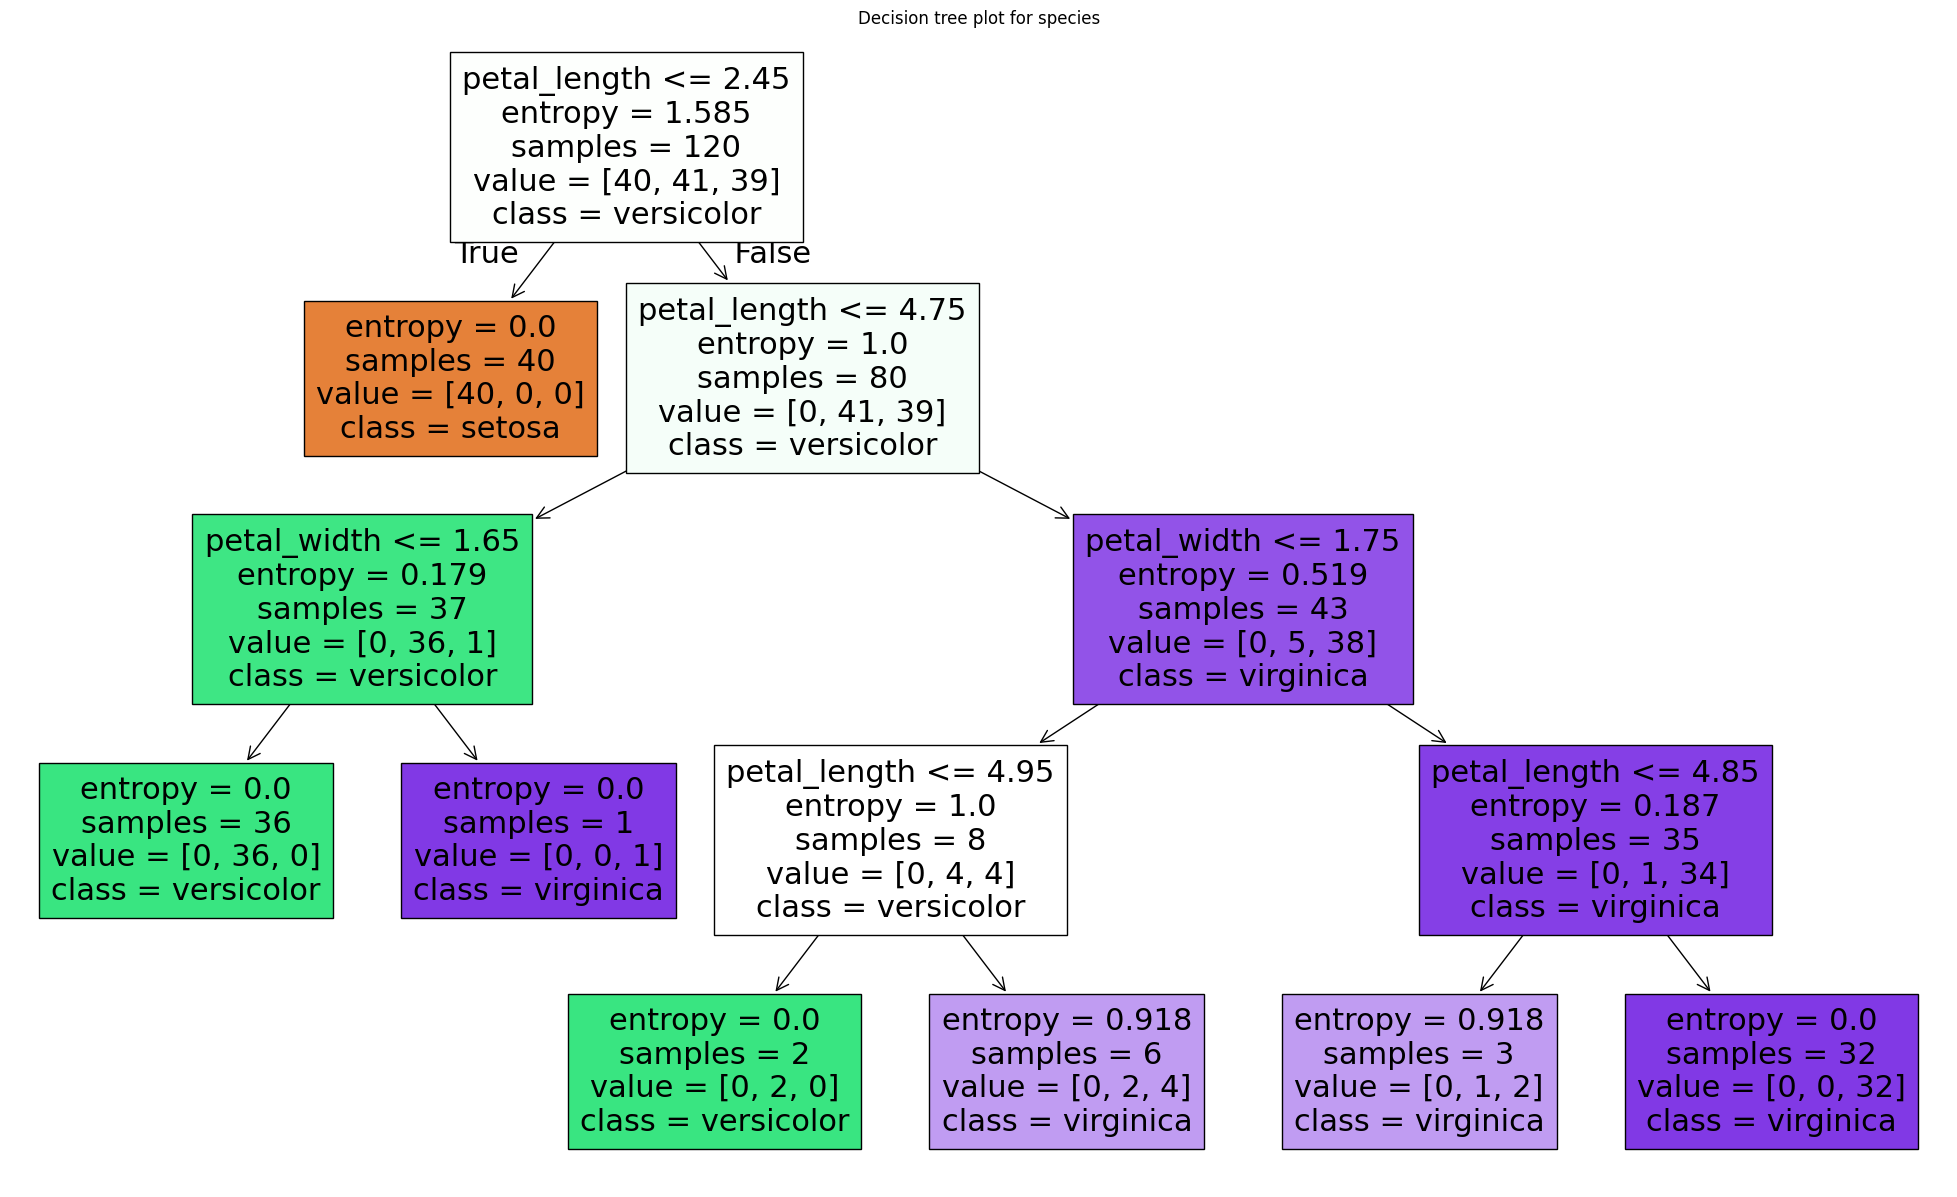

In [26]:
#decision tree visualization
plt.figure(figsize=(25, 15))
tree.plot_tree(model_clf, feature_names=X.columns, class_names=model_clf.classes_, filled=True)
plt.title("Decision tree plot for species")